# TASK-1 PREDICTION USING SUPERVISED ML (simple linear regression)
 **- by Adepu Bhavani**

In this task we predict percentage of marks of a student based on number of study hours using linear regression as we have only two variables.

Data is available at the URL: http://bit.ly/w-data

**STEP-1 import all required python libraries**


In [77]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

**STEP-2 Load the Dataset**

In [78]:
raw_data = pd.read_csv("http://bit.ly/w-data")

In [79]:
raw_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [80]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**STEP-3 EXPLORATORY DATA ANALYSIS**

our dataset has two columns HOURS and SCORES with no missing and inconsistent data.We don't have any categorical data as both the columns include only numerical data of type Float and int. Hence, No data cleaning is required for our dataset

**Exploring descriptive statistics and derterming vairaibles of interest**

In [81]:
raw_data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [82]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<AxesSubplot:xlabel='Hours', ylabel='Density'>

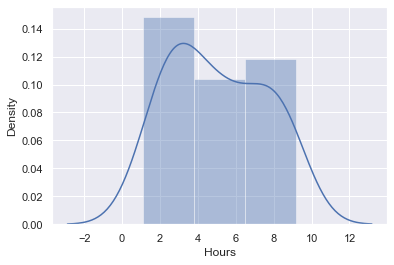

In [83]:
sns.distplot(raw_data['Hours'])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

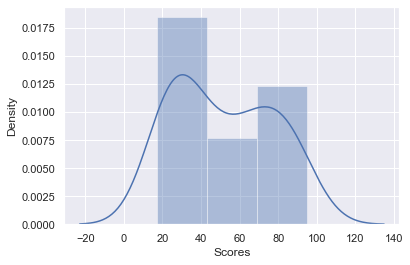

In [84]:
sns.distplot(raw_data['Scores'])

No outliers are found

**STEP-4 LINEAR REGRESSION**

**Declare inputs and outputs**

In [85]:
#y = raw_data['Scores']
#x = raw_data['Hours']

x = raw_data.iloc[:, :-1].values  
y = raw_data.iloc[:, 1].values  

In [86]:
np.reshape(y, (25, ))

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [87]:
np.reshape(x, (25, ))

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

**Exploring the data**

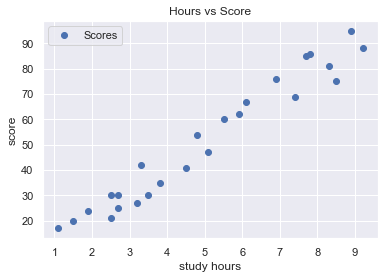

In [88]:
raw_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('study hours')  
plt.ylabel('score')  
plt.show()

From the graph above, we can clearly see that the score increases as the number of hours increases i.e, a positive linear relation

**Split TRAIN and TEST data**

In [89]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

**Training the model** 

In [90]:
reg = LinearRegression()

reg.fit(x_train,y_train)
print("training the model is successful")

training the model is successful


**estimating training prediction**

In [91]:
y_hat = reg.predict(x_train) #predictions are stored in y^(y_train should match y_hat)

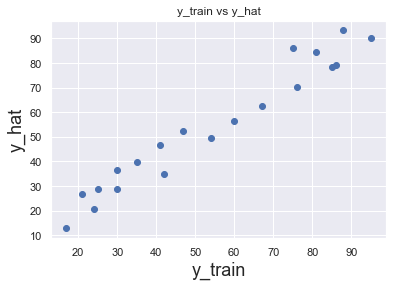

In [92]:
plt.scatter(y_train,y_hat)
plt.title('y_train vs y_hat')  
plt.xlabel('y_train',size=18)  
plt.ylabel('y_hat',size=18) 
plt.show()

Text(0.5, 1.0, 'residual PDF')

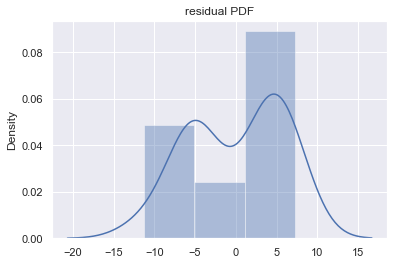

In [93]:
sns.distplot(y_train-y_hat)
plt.title("residual PDF")

In [94]:
reg.score(x_train,y_train)

0.9515510725211552

**finding weights and bias(intercept and coeff)**

In [95]:
reg.intercept_

2.018160041434683

In [96]:
reg.coef_

array([9.91065648])

**testing the model**

In [97]:
y_hat_test = reg.predict(x_test)

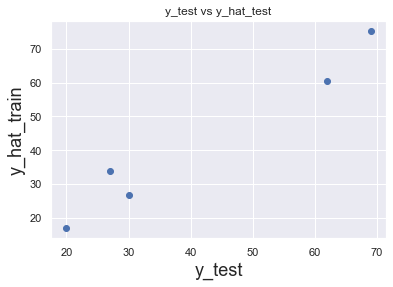

In [98]:
plt.scatter(y_test,y_hat_test)
plt.title('y_test vs y_hat_test')  
plt.xlabel('y_test',size=18)  
plt.ylabel('y_hat_train',size=18) 

plt.show()

**Comparing actual and predicted values**

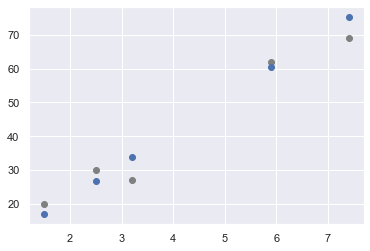

In [99]:
plt.scatter(x_test,y_test, color = 'grey')
plt.scatter(x_test,y_hat_test)


plt.show()

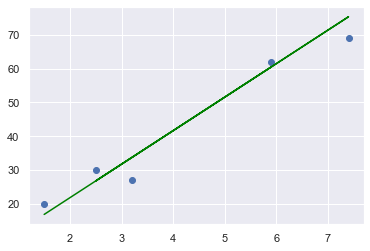

In [100]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_hat_test,color = 'green')


plt.show()

In [101]:
# Comparing Actual vs Predicted
df_performance = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test})  
df_performance

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [102]:
#calculating residuals
df_performance['residuals']=df_performance['Actual']-df_performance['Predicted']
df_performance

,Actual,Predicted,residuals
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [103]:
#difference%
df_performance['difference%']=np.absolute(df_performance['residuals']/df_performance['Actual']*100)
df_performance

,Actual,Predicted,residuals,difference%
0,20,16.884145,3.115855,15.579276
1,27,33.732261,-6.732261,24.934299
2,69,75.357018,-6.357018,9.213070
3,30,26.794801,3.205199,10.683996
4,62,60.491033,1.508967,2.433817


In [104]:
df_performance.describe()

,Actual,Predicted,residuals,difference%
count,5.000000,5.000000,5.000000,5.000000
mean,41.600000,42.651852,-1.051852,12.568892
std,22.255336,24.407192,5.061173,8.359124
min,20.000000,16.884145,-6.732261,2.433817
25%,27.000000,26.794801,-6.357018,9.213070
50%,30.000000,33.732261,1.508967,10.683996
75%,62.000000,60.491033,3.115855,15.579276
max,69.000000,75.357018,3.205199,24.934299


**testing with own data**

**what will be the score if student studies for 9.25 hrs/day?**

In [105]:
hours = 9.25
score_predicted = reg.predict(np.array(hours).reshape(1,1))
print(' \033[1;30m Answer: The score of the student if he studies for {}hrs/day is \033[1;32m {} '.format(hours,*score_predicted))

  Answer: The score of the student if he studies for 9.25hrs/day is  93.69173248737538 


**STEP:5 Evaluating the model**

We can choose any of the available metrics, here we choose **mean square error**. This step is a concluding step of our regression process and is important to compare various algorithms performed on the same dataset

In [106]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_hat_test)) 

Mean Absolute Error: 4.183859899002975
